In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

PROBANDO

In [18]:
df = pd.read_excel('Data.xlsx')
df.head()

,Item Code,Item Name,12 Months,ABC,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
0,500550,item 1,9198652,C,711766.0,733480.0,666115.0,673894.0,701181.0,739330.0,...,697939,676514,738450,711835,666629,680773,711824,692380,685079,657886
1,500061,item 2,8786040,C,461200.0,461200.0,649200.0,589000.0,938600.0,930400.0,...,715000,825000,715000,715000,715000,715000,0,0,0,0
2,500552,item 3,4580000,C,NaN,NaN,NaN,NaN,NaN,NaN,...,720000,611000,708000,708000,611000,611000,611000,611000,611000,611000
3,500106,item 4,7327100,C,475200.0,475200.0,418000.0,511200.0,682400.0,908400.0,...,610000,800000,770000,810000,0,0,0,0,0,0
4,500551,item 5,7266600,C,316800.0,316800.0,573600.0,460800.0,385800.0,735600.0,...,630000,666000,666000,666000,503500,503500,503500,503500,503500,503500


In [35]:
# Detectar columnas de fecha (saltando las 3 primeras columnas que no son fechas)
columnas_fecha = df.columns[4:]  # desde la columna 5 en adelante
columnas_fecha_dt = pd.to_datetime(columnas_fecha)

# Definir rango
fecha_inicio = pd.to_datetime("2021-06-01")
fecha_fin = pd.to_datetime("2022-06-01")

# Filtrar columnas dentro del rango
cols_rango = [col for col, fecha in zip(columnas_fecha, columnas_fecha_dt)
              if fecha_inicio <= fecha <= fecha_fin]

# Crear nuevo dataframe con suma en el rango
df_resultado = df[['Item Name']].copy()
df_resultado['total_amount'] = df[cols_rango].sum(axis=1)

print(df_resultado)

    Item Name  total_amount
0      item 1     9198652.0
1      item 2     8786040.0
2      item 3     4580000.0
3      item 4     7327100.0
4      item 5     7266600.0
..        ...           ...
547  item 548           0.0
548  item 549           0.0
549  item 550           0.0
550  item 551           0.0
551  item 552           0.0

[552 rows x 2 columns]


In [41]:
num_Items = len(df_resultado)
total_revenue = df_resultado['total_amount'].sum()
print(total_revenue)

df_resultado['%Item'] = ((df_resultado.index + 1) / num_Items) * 100
df_resultado['%Item'] = df_resultado['%Item'].map('{:.1f}%'.format)

resultados = []
for i in range(len(df_resultado)):
    if i == 0:
        valor = df_resultado.loc[i, 'total_amount'] / total_revenue
    else:
        valor = ((df_resultado.loc[i, 'total_amount'] / total_revenue) + resultados[i-1]) 
    resultados.append(valor)
    

df_resultado['%Revenue'] = resultados
df_resultado['%Revenue'] = df_resultado['%Revenue'] * 100

ABC = []
for i in range(len(df_resultado)):
    valor_actual = df_resultado.loc[i, '%Revenue']
    
    if valor_actual <= 40:
        valor = 'A'
    elif valor_actual <= 80:
        valor = 'B'
    else:
        valor = 'C'
        
    ABC.append(valor)

df_resultado['ABC'] = ABC


df_resultado['%Revenue'] = df_resultado['%Revenue'].map('{:.1f}%'.format)

print(df_resultado)

393073091.0
    Item Name  total_amount   %Item %Revenue ABC
0      item 1     9198652.0    0.2%     2.3%   A
1      item 2     8786040.0    0.4%     4.6%   A
2      item 3     4580000.0    0.5%     5.7%   A
3      item 4     7327100.0    0.7%     7.6%   A
4      item 5     7266600.0    0.9%     9.5%   A
..        ...           ...     ...      ...  ..
547  item 548           0.0   99.3%   100.0%   C
548  item 549           0.0   99.5%   100.0%   C
549  item 550           0.0   99.6%   100.0%   C
550  item 551           0.0   99.8%   100.0%   C
551  item 552           0.0  100.0%   100.0%   C

[552 rows x 5 columns]


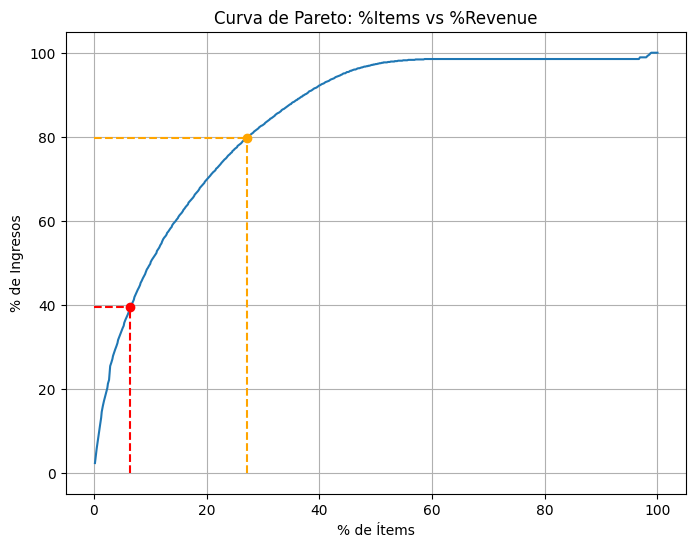

In [43]:
# Asegurarte de que %Item y %Revenue están como números (en caso de que los hayas formateado como string con %)
df_resultado['%Item_num'] = df_resultado['%Item'].str.replace('%', '').astype(float)
df_resultado['%Revenue_num'] = df_resultado['%Revenue'].str.replace('%', '').astype(float)

# Obtener el último valor de A y de B
ultimo_A = df_resultado[df_resultado['ABC'] == 'A'].iloc[-1]
ultimo_B = df_resultado[df_resultado['ABC'] == 'B'].iloc[-1]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(df_resultado['%Item_num'], df_resultado['%Revenue_num'])

# Marcar y dibujar "L" para el último A
plt.plot([ultimo_A['%Item_num'], ultimo_A['%Item_num']], [0, ultimo_A['%Revenue_num']], color='red', linestyle='--')
plt.plot([0, ultimo_A['%Item_num']], [ultimo_A['%Revenue_num'], ultimo_A['%Revenue_num']], color='red', linestyle='--')
plt.scatter(ultimo_A['%Item_num'], ultimo_A['%Revenue_num'], color='red', zorder=5, label="Último A")

# Marcar y dibujar "L" para el último B
plt.plot([ultimo_B['%Item_num'], ultimo_B['%Item_num']], [0, ultimo_B['%Revenue_num']], color='orange', linestyle='--')
plt.plot([0, ultimo_B['%Item_num']], [ultimo_B['%Revenue_num'], ultimo_B['%Revenue_num']], color='orange', linestyle='--')
plt.scatter(ultimo_B['%Item_num'], ultimo_B['%Revenue_num'], color='orange', zorder=5, label="Último B")


# Etiquetas y título
plt.xlabel('% de Ítems')
plt.ylabel('% de Ingresos')
plt.title('Curva de Pareto: %Items vs %Revenue')
plt.grid(True)

plt.show()